In [1]:
from tensorflow.keras import datasets
from keras.utils import np_utils

(X_train,y_train),(X_test,y_test)=datasets.mnist.load_data()
print(y_train[:5])
y_train=np_utils.to_categorical(y_train)
print(y_train[:5])
y_test=np_utils.to_categorical(y_test)
L,W,H=X_train.shape
X_train=X_train.reshape(-1,W*H)
X_test=X_test.reshape(-1,W*H)
X_train=X_train/255.0
X_test=X_test/255.0

[5 0 4 1 9]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [2]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

def make_model(input_number, layers, output_number):
    model=Sequential()
    model.add(Dense(layers[0], activation='relu', input_shape=(input_number,),name='Hidden-1'))
    model.add(Dense(layers[1], activation='relu', name='Hidden-2'))
    model.add(Dense(layers[2], activation='relu', name='Hidden-3'))
    model.add(Dropout(0.2))
    model.add(Dense(output_number,activation='softmax',name='output'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [3]:
input_number=784
hidden_layers=[128,64,32]
print(hidden_layers)
number_of_class=10
output_number=number_of_class
model=make_model(input_number,hidden_layers,output_number)

[128, 64, 32]


In [8]:
hist=model.fit(X_train,y_train, epochs=50,batch_size=100,validation_split=0.2)

Epoch 1/50
480/480 [==============================] - 1s 2ms/step - loss: 0.0691 - accuracy: 0.9801 - val_loss: 0.1021 - val_accuracy: 0.9709
Epoch 2/50
480/480 [==============================] - 1s 1ms/step - loss: 0.0576 - accuracy: 0.9823 - val_loss: 0.1000 - val_accuracy: 0.9719
Epoch 3/50
480/480 [==============================] - 1s 2ms/step - loss: 0.0479 - accuracy: 0.9855 - val_loss: 0.0987 - val_accuracy: 0.9740
Epoch 4/50
480/480 [==============================] - 1s 1ms/step - loss: 0.0428 - accuracy: 0.9874 - val_loss: 0.1106 - val_accuracy: 0.9735
Epoch 5/50
480/480 [==============================] - 1s 2ms/step - loss: 0.0374 - accuracy: 0.9883 - val_loss: 0.0920 - val_accuracy: 0.9762
Epoch 6/50
480/480 [==============================] - 1s 2ms/step - loss: 0.0330 - accuracy: 0.9896 - val_loss: 0.1030 - val_accuracy: 0.9758
Epoch 7/50
480/480 [==============================] - 1s 2ms/step - loss: 0.0282 - accuracy: 0.9910 - val_loss: 0.1139 - val_accuracy: 0.9747
Epoch 

In [9]:
performance_test=model.evaluate(X_test,y_test,batch_size=100)
print('Loss,Accuracy:', performance_test)

100/100 [==============================] - 0s 1ms/step - loss: 0.1605 - accuracy: 0.9788
Loss,Accuracy: [0.16054025292396545, 0.9787999987602234]


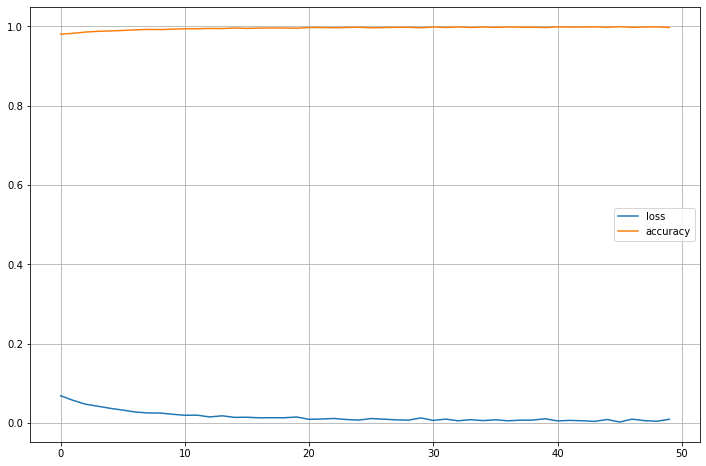

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy']) 
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-1 (Dense)            (None, 128)               100480    
                                                                 
 Hidden-2 (Dense)            (None, 64)                8256      
                                                                 
 Hidden-3 (Dense)            (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________
